# Linear Regressions

## Learning Objectives

- Use the **pandas library** to read data into Python.
- Use the **display library** to visualize data.
- Understand **linear regression**, and how does it work.
- Understand **train and interpret** a linear regression model in scikit-learn.
- Learn some **evaluation metrics** for regression problems.
- How do I choose **which features to include** in my model?

## Types of supervised learning

- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response

## Reading data using pandas

**Pandas:** popular Python library for data exploration, manipulation, and analysis

In [161]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from IPython.display import display
from sklearn import metrics

In [162]:
# read CSV file directly from a URL and save the results
import pandas as pd
#data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data = pd.read_csv('douglas_data.csv', skipinitialspace=True, index_col=0)

# display the first 5 rows
data.head()

,moisture,knot,treering,edyn,density,bheight,estat,bstrength
DO1,13.3,0.04,3.00,14053,675,101,15452,58.40
DO2,12.0,0.16,2.50,20611,474,100,17272,74.35
DO3,12.8,0.14,3.88,18846,596,99,18456,49.82
DO4,11.7,0.13,2.02,18587,582,100,18940,78.52
DO5,12.0,0.16,2.13,19299,678,100,16864,79.31


In [163]:
display(data)



,moisture,knot,treering,edyn,density,bheight,estat,bstrength
DO1,13.3,0.04,3.00,14053,675,101,15452,58.40
DO2,12.0,0.16,2.50,20611,474,100,17272,74.35
DO3,12.8,0.14,3.88,18846,596,99,18456,49.82
DO4,11.7,0.13,2.02,18587,582,100,18940,78.52
DO5,12.0,0.16,2.13,19299,678,100,16864,79.31
DO6,12.4,0.04,2.98,21695,595,100,19440,64.34
DO7,12.5,0.32,3.67,16523,592,100,16152,58.19
DO8,11.5,0.07,3.67,18333,634,101,18480,88.39
DO9,13.1,0.19,2.44,18628,592,101,14604,33.02
DO10,11.7,0.25,3.00,15683,540,101,16628,60.28


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [164]:
# display the last 5 rows
data.tail()

,moisture,knot,treering,edyn,density,bheight,estat,bstrength
DO356,14.1,0.18,5.56,13652,517,175,14572,47.4
DO357,12.7,0.45,7.38,9358,465,197,9768,23.1
DO358,13.1,0.45,4.90,12433,539,175,13380,31.9
DO359,13.9,0.33,5.28,10721,534,174,8368,28.8
DO360,12.9,0.19,5.16,14075,532,175,14124,48.7


In [165]:
# check the shape of the DataFrame (rows, columns)
data.shape

(360, 8)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

- Anaconda users: run **`conda install seaborn`** from the command line
- Other users: [installation instructions](http://stanford.edu/~mwaskom/software/seaborn/installing.html)

In [166]:
# conventional way to import seaborn
#import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

In [167]:
# visualize the relationship between the features and the response using scatterplots
#sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

Coefficients: 
 [[-1.2782344]]
Mean squared error: 283.39
Variance score: 0.02


/home/centos/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


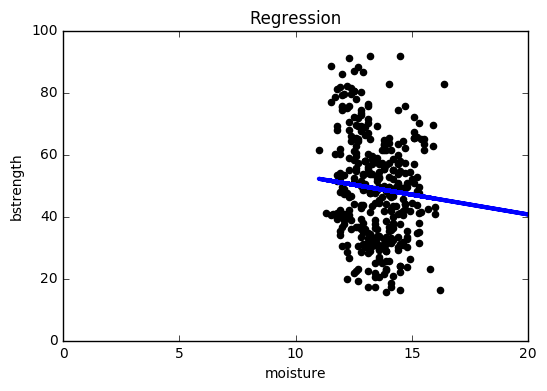

In [168]:
# equivalent command to do this in one line
X = data[['moisture']]

# print the first 5 rows
X.head()

Y = data[['bstrength']]
Y.head()

# Use only one feature
#data_X = data.data[:, np.newaxis, 2]
#diabetes_Y = diabetes.target[:, np.newaxis, 2]

# Split the data into training/testing sets
#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#diabetes_y_train = diabetes.target[:-20]
#diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, Y)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X) - Y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X, Y))

# Plot outputs
plt.scatter(X, Y,  color='black')

plt.plot(X, regr.predict(X), color='blue',
         linewidth=3)






plt.xlabel('moisture')
plt.ylabel('bstrength')
plt.title('Regression')
plt.xlim([0,20])
plt.ylim([0, 100])
plt.legend()





plt.show()

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [169]:
# create a Python list of feature names
feature_cols = ['moisture', 'knot', 'treering', 'density', 'bheight', 'estat', 'bstrength']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['moisture', 'knot', 'treering', 'density', 'bheight', 'estat']]

# print the first 5 rows
X.head()

,moisture,knot,treering,density,bheight,estat
DO1,13.3,0.04,3.00,675,101,15452
DO2,12.0,0.16,2.50,474,100,17272
DO3,12.8,0.14,3.88,596,99,18456
DO4,11.7,0.13,2.02,582,100,18940
DO5,12.0,0.16,2.13,678,100,16864


In [170]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(360, 6)


In [171]:
# select a Series from the DataFrame
y = data['bstrength']

# equivalent command that works if there are no spaces in the column name
y = data.bstrength

# print the first 5 values
y.head()

DO1    58.40
DO2    74.35
DO3    49.82
DO4    78.52
DO5    79.31
Name: bstrength, dtype: float64

In [172]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(360,)


## Splitting X and y into training and testing sets

In [173]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [174]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(270, 6)
(270,)
(90, 6)
(90,)


## Linear regression in scikit-learn

In [175]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [176]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

32.3595221704
[ -4.17091677e-02  -2.77334039e+01  -8.52736495e-01   1.81922698e-02
  -1.37385633e-01   2.81114139e-03]


In [177]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('moisture', -0.0417091677047772),
 ('knot', -27.733403941309465),
 ('treering', -0.85273649507661431),
 ('density', 0.018192269805966887),
 ('bheight', -0.13738563297861894),
 ('estat', 0.0028111413903531002)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Making predictions

In [178]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [179]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [180]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
#from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [181]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [182]:
# calculate RMSE by hand
#import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139
12.2474487139


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Sales predictions

In [183]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

9.87060713143


## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [184]:
# create a Python list of feature names
feature_cols = ['moisture', 'bheight']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.bstrength

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

17.2566337619


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

## Resources

Linear regression:

- [Longer notebook on linear regression](https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb) by me
- Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) by Hastie and Tibshirani (Stanford)
- [Quick reference guide to applying and interpreting linear regression](http://www.dataschool.io/applying-and-interpreting-linear-regression/) by me
- [Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) by Robert Nau (Duke)

Pandas:

- [Three-part pandas tutorial](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) by Greg Reda
- [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) and [read_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) documentation